In [1]:
!pip install tensorflow==1.14.0 -q
!pip install tensorflow-gpu==1.14 -q
!pip install h5py==2.10.0 -q
!pip install scikit-learn==0.20.0 -q
!pip install anndata scanpy adjustText -q

     |████████████████████████████████| 109.3 MB 40 kB/s 
     |████████████████████████████████| 488 kB 44.0 MB/s 
     |████████████████████████████████| 3.1 MB 43.3 MB/s 
     |████████████████████████████████| 50 kB 5.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.14.0 which is incompatible.
     |████████████████████████████████| 377.1 MB 8.7 kB/s 
     |████████████████████████████████| 2.9 MB 29.9 MB/s 
     |████████████████████████████████| 5.3 MB 21.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.20.0 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you h

In [2]:
!pip install h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires h5py>=3, but you have h5py 2.10.0 which is incompatible.
anndata 0.8.0 requires h5py>=3, but you have h5py 2.10.0 which is incompatible.


**DON'T FORGET TO RESTART THE RUNTIME TO USE OLDER TF1, SKLEARN**







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/1edv/evolution.git
%cd /content/evolution/
!cp /content/evolution/manuscript_code/aux.py .

Cloning into 'evolution'...
remote: Enumerating objects: 2076, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 2076 (delta 160), reused 73 (delta 67), pack-reused 1896
Receiving objects: 100% (2076/2076), 225.31 MiB | 28.63 MiB/s, done.
Resolving deltas: 100% (1250/1250), done.
Checking out files: 100% (335/335), done.
/content/evolution


In [ ]:
from aux import *
import scipy

In [ ]:
print(tf.__version__) #should be 1.14.0
print(keras.__version__) #should be 2.2.4-tf
print(h5py.__version__)

1.14.0
2.2.4-tf
2.10.0


#inference

In [ ]:
with open('/content/drive/MyDrive/AAV2_viability_DeepAttn-regression/model_params.pkl',"rb") as f:
  model_params = pickle.load(f)

model = fitness_function_model(model_params)
model.load_weights("/content/drive/MyDrive/AAV2_viability_DeepAttn-regression/AAV2_Protein_regressor.h5" )

# Evaluate model

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/seq_design_t01_perplexity.txt', sep='\t')
df.head(2)

,seq,T,score,seq_recovery,perplexity
0,D E S A I R G V N P V A Y E P Y G S V L I N T ...,0.1,0.8735,0.5000,4.612033
1,D Q D A I R G V N P V A Y E P Y G S V L V N T ...,0.1,0.9348,0.4643,4.612033


In [ ]:
def encode_seq(sequence, max_length=50):
  sequence = sequence.replace(" ", "")
  alphabet = ['A', 'C', 'D', 'E', 'F', 'G','H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
  char_to_int = dict((c, i) for i, c in enumerate(alphabet))
  integer_encoded = [char_to_int[char] for char in sequence]
  onehot_encoded = list()

  for value in integer_encoded:
      letter = [0 for _ in range(len(alphabet))]
      letter[value] = 1
      onehot_encoded.append(letter)

  #pad the end of the sequence with all-0 vectors
  if len(integer_encoded) < max_length:
    for _ in range(max_length-len(integer_encoded)):
      onehot_encoded.append([0 for _ in range(len(alphabet))])

  return np.array(onehot_encoded)

In [ ]:
seqdata_transformed = [encode_seq(seq,50) for seq in df.seq.tolist()]
seqdata_transformed = np.asarray(seqdata_transformed)
print(seqdata_transformed.shape)
pred_ = model.predict(seqdata_transformed)

(976, 50, 20)


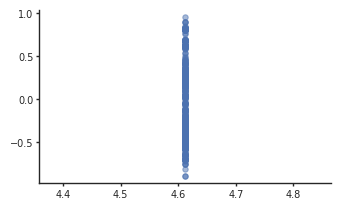

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=df.perplexity, y=pred_, alpha=0.5, s=15)
plt.show()

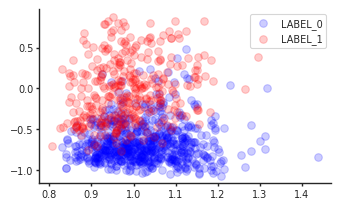

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors

scatter_x = np.array(df.score.astype(float))
scatter_y = np.array(pred_.astype(float))
group = np.array(df.esm1b_prediction)
cdict = {'LABEL_1': 'red', 'LABEL_0': 'blue'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix],
               c = cdict[g], label = g, 
               s = 30, alpha=0.2
               )
ax.legend()
plt.show()